<table>
  <tr>
    <td> <b> Roll no.: </b> N031 </td>
    <td> <b> Name: </b> Shourya Gupta </td>
  </tr>
  <tr>
    <td> <b> Program and Division: </b> MBA Tech CE D</td>
    <td> <b> Batch: </b> B1 </td>
  </tr>   
</table>

# **Experiment 5**

### **Aim**

Exploratory data analysis of textual data

### **Importing necessary libraries**

In [ ]:
!pip install pypdf
!pip install pdfplumber

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

from matplotlib import font_manager as fm, rcParams
from pypdf import PdfReader

import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Task A**
To access two books or novels and perform various EDA tasks

In [ ]:
missing_values = ['na','NA', 'N/A', 'N/a', 'not available', 'missing', np.nan]

book1 = PdfReader("PK_TNINF.pdf")
book2 = PdfReader("RK_TLTF.pdf")
print("Book 1 Pages: ",len(book1.pages),"\nBook 2 Pages: ",len(book2.pages))

Book 1 Pages:  116 
Book 2 Pages:  378


In [ ]:
# reading a random page of book 1
pagereader = book1.pages[59]
print(pagereader.extract_text())

T h e  N i g h t  I ’ l l  N e v e r  F o r g e t  
 
59 
  
“Do whatever you like doing, kid . If you fall off, not my fault .” 
Huh! The day he goes, I’ll be the happiest person alive.  
“He’s a jerk.”  
“A big jerk. ” 
 
The feathery clouds that once touched the rocky hills, the aciculate trees, 
water filled c raters, the cars, have now settled down and made the 
surrounds clear and tranquil. The sun has heated up the chilly atmosphere 
with its blasting sunrays.   
It’s been f our hours since we left Shimla and we haven’ t even made 
halfway through, all thanks to Sam’s snail -slow Buggy. While Aunt Chippy  
was sitting on the passenger’s seat, we three were made to stuff up at the 
back. Nonetheless, all I need is a window besides me. If it’s there, no 
wonder wherever you take me, I’ll go. On the other hand, Rohan was 
enjoying….. having fun  
“Heeeyyy! Saaam! S low downnnnn….  You’re gonna drop me in the in the 
chasm…. Hey Saaaammm”  cried Rohan as Sam made a sharp turn which 

In [ ]:
# reading a random page of book 2
pagereader = book2.pages[63]
print(pagereader.extract_text())

46THELIGHTTHATFAILED chap.
'Goodenough,'saidDick,lookingroundthe
largeroomthattookupathirdofatopstoryin
thericketychambersoverlookingtheThames.A
paleyellowsunshonethroughtheskylightand
showedthemuchdirtoftheplace.Threesteps
ledfromthedoortothelanding,andthreemoreto
Torpenhow'sroom.Thewellofthestaircasedis-
appearedintodarkness,prickedbytinygas-jets,and
thereweresoundsofmentalkinganddoorsslam-
mingsevenflightsbelow,inthewarmgloom.
'Dotheygiveyouafreehandhere?'saidDick,
cautiously.HewasIshmaelenoughto-knowthe
valueofliberty.
'Anythingyoulike:latch-keysandlicenseun-
limited.Wearepermanenttenantsforthemost
parthere.'Tisn'taplaceIwouldrecommend
foraYoungMen'sChristianAssociation,butit
willserve.ItooktheseroomsforyouwhenI
wired.'
'You'reagreatdealtookind,oldman.'
'Youdidn'tsupposeyouweregoingawayfrom
me,didyou?
'TorpenhowputhishandonDick's
shoulder,andthetwowalkedupanddownthe
room,henceforward tobecalledthestudio,in
sweetandsilentcommunion.Theyheardrapping
atTorpenhow'sdoor.'That'ssomeruffia

### **Obtain most frequent words distribution**

In [ ]:
# Extracts the most frequent words from a book.
def freq_words(book):
  text = ""
  for page in book.pages:
    text += page.extract_text()

  tokens = word_tokenize(text) # to tokenize the extracted text

  # Removing punctuations
  tokens = [word for word in tokens if word.isalnum()]

  # Removing stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.lower() not in stop_words]

  # Removing single-letter words
  tokens = [word for word in tokens if len(word) > 1]

  # getting frequency of words
  word_counts = Counter(tokens)
  most_frequent_words = word_counts.most_common(10) # storing top 10 most frequent words

  return most_frequent_words

In [ ]:
book1_freq_words = freq_words(book1)
book2_freq_words = freq_words(book2)

print("Most frequent words in Book 1:", book1_freq_words,"\nMost frequent words in Book 2:", book2_freq_words)

Most frequent words in Book 1: [('said', 192), ('Sam', 178), ('house', 112), ('Rohan', 107), ('asked', 97), ('like', 83), ('would', 75), ('us', 70), ('Karan', 66), ('back', 63)] 
Most frequent words in Book 2: [('chap', 121), ('Dick', 54), ('Maisie', 37), ('CHAP', 25), ('andthe', 20), ('sir', 19), ('Oh', 16), ('Torp', 16), ('Nilghai', 16), ('Torpenhow', 14)]


### **Average chapter length**

In [ ]:
def avg_chapLen(book):
  # extracting text from all pages
  text = ""
  for page in book.pages:
    text += page.extract_text()

  # splitting the text into chapters using regex
  chapters = re.split(r'Chapter\s+\d+', text)

  # removing empty strings from the list
  chapters = [chapter for chapter in chapters if chapter]

  total_length = sum(len(chapter) for chapter in chapters)
  avg_length = total_length / len(chapters) if len(chapters) > 0 else 0

  return avg_length

In [ ]:
book1_avg_chapLen = avg_chapLen(book1)
book2_avg_chapLen = avg_chapLen(book2)

print("Average chapter length in Book 1:", book1_avg_chapLen,"\nAverage chapter length in Book 2:", book2_avg_chapLen)

Average chapter length in Book 1: 157172.0 
Average chapter length in Book 2: 339129.0


### **Most frequent bigram, trigram, quadgram**

In [ ]:
def freq_phrases(book, n):
  text = ""
  for page in book.pages:
    text += page.extract_text()

  tokens = word_tokenize(text)

  # Removing punctuations
  tokens = [word for word in tokens if word.isalnum()]

  # Removing stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.lower() not in stop_words]

  # Removing single-letter words
  tokens = [word for word in tokens if len(word) > 1]

  # Generating n-grams
  n_grams = list(ngrams(tokens, n))

  # counting frequency of n-grams
  n_gram_counts = Counter(n_grams)
  most_frequent_n_grams = n_gram_counts.most_common(10)

  return most_frequent_n_grams

In [ ]:
# frequent bi-grams in book1
book1_bi_grams = freq_phrases(book1, 2)
print("Most frequent bi-grams in Book 1:", book1_bi_grams)

# frequent tri-grams in book1
book1_tri_grams = freq_phrases(book1, 3)
print("Most frequent tri-grams in Book 1:", book1_tri_grams)

# frequent quad-grams in book1
book1_quad_grams = freq_phrases(book1, 4)
print("Most frequent quad-grams in Book 1:", book1_quad_grams)

Most frequent bi-grams in Book 1: [(('Uncle', 'Sam'), 38), (('said', 'Sam'), 35), (('Aunt', 'Chippy'), 30), (('said', 'Rohan'), 25), (('gon', 'na'), 17), (('said', 'Karan'), 14), (('asked', 'Sam'), 11), (('asked', 'Rohan'), 11), (('said', 'Riya'), 11), (('said', 'Aunt'), 11)]
Most frequent tri-grams in Book 1: [(('said', 'Aunt', 'Chippy'), 11), (('really', 'really', 'really'), 7), (('Google', 'Play', 'Books'), 4), (('asked', 'Uncle', 'Sam'), 4), (('along', 'Uncle', 'Sam'), 4), (('feel', 'body', 'parts'), 4), (('standing', 'outside', 'window'), 3), (('happened', 'last', 'night'), 3), (('Arjit', 'Ayan', 'Ronnie'), 3), (('Uncle', 'Sam', 'said'), 3)]
Most frequent quad-grams in Book 1: [(('really', 'really', 'really', 'really'), 4), (('horse', 'flung', 'two', 'legs'), 3), (('flung', 'two', 'legs', 'air'), 3), (('Night', 'Never', 'Forget', 'Google'), 2), (('Never', 'Forget', 'Google', 'Play'), 2), (('Forget', 'Google', 'Play', 'Edition'), 2), (('might', 'trick', 'Grandpa', 'get'), 2), (('tr

In [ ]:
# frequent bi-grams in book2
book2_bi_grams = freq_phrases(book2, 2)
print("Most frequent bi-grams in Book 2:", book2_bi_grams)

# frequent tri-grams in book2
book2_tri_grams = freq_phrases(book2, 3)
print("Most frequent tri-grams in Book 2:", book2_tri_grams)

# frequent quad-grams in book2
book2_quad_grams = freq_phrases(book2, 4)
print("Most frequent quad-grams in Book 2:", book2_quad_grams)

Most frequent bi-grams in Book 2: [(('ED', 'chap'), 3), (('bytheway', 'name'), 2), (('Mr', 'Heldar'), 2), (('Maisie', 'dear'), 2), (('impressionist', 'girl'), 2), (('mylove', 'mylove'), 2), (('Dick', 'Oh'), 2), (('Oh', 'Maisie'), 2), (('riG', 'PR'), 1), (('PR', 'CORNELL'), 1)]
Most frequent tri-grams in Book 2: [(('riG', 'PR', 'CORNELL'), 1), (('PR', 'CORNELL', 'UNIVERSITY'), 1), (('CORNELL', 'UNIVERSITY', 'LIBRARY'), 1), (('UNIVERSITY', 'LIBRARY', 'GIFTOF'), 1), (('LIBRARY', 'GIFTOF', 'CornellUniversity'), 1), (('GIFTOF', 'CornellUniversity', 'Library'), 1), (('CornellUniversity', 'Library', 'Theoriginaloftliisbool'), 1), (('Library', 'Theoriginaloftliisbool', 'isin'), 1), (('Theoriginaloftliisbool', 'isin', 'tineCornellUniversityLibrary'), 1), (('isin', 'tineCornellUniversityLibrary', 'Therearenoknowncopyrightrestrictions'), 1)]
Most frequent quad-grams in Book 2: [(('riG', 'PR', 'CORNELL', 'UNIVERSITY'), 1), (('PR', 'CORNELL', 'UNIVERSITY', 'LIBRARY'), 1), (('CORNELL', 'UNIVERSITY',

### **Most frequent names**

In [ ]:
def find_characters_places(book):
  text = ""
  for page in book.pages:
    text += page.extract_text()

  tokens = word_tokenize(text)

  # Removing punctuations
  tokens = [word for word in tokens if word.isalnum()]

  # Removing stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.lower() not in stop_words]

  # Removing single-letter words
  tokens = [word for word in tokens if len(word) > 1]

  # assuming capitalized words are most probably names or places
  potential_characters_places = [word for word in tokens if word[0].isupper()]

  counts = Counter(potential_characters_places)
  most_frequent = counts.most_common(20)

  return most_frequent

In [ ]:
book1_characters_places = find_characters_places(book1)
print("Most frequent characters and places in Book 1:", book1_characters_places)

book2_characters_places = find_characters_places(book2)
print("Most frequent characters and places in Book 2:", book2_characters_places)

Most frequent characters and places in Book 1: [('Sam', 178), ('Rohan', 107), ('Karan', 66), ('Uncle', 54), ('Riya', 50), ('Grandpa', 46), ('Vardhika', 35), ('Chippy', 31), ('Aunt', 31), ('Hey', 29), ('Oh', 28), ('Stork', 27), ('Ayan', 25), ('Ronnie', 24), ('Arjit', 21), ('Debu', 17), ('Let', 16), ('Sweetie', 15), ('Google', 12), ('Shimla', 12)]
Most frequent characters and places in Book 2: [('Dick', 54), ('Maisie', 37), ('CHAP', 25), ('Oh', 16), ('Torp', 16), ('Nilghai', 16), ('Torpenhow', 14), ('Dickie', 14), ('Bess', 13), ('XIVTHELIGHTTHATFAILED', 12), ('Binkie', 9), ('XVTHELIGHTTHATFAILED', 9), ('Bessie', 8), ('VITHELIGHTTHATFAILED', 7), ('XTHELIGHTTHATFAILED', 7), ('Well', 6), ('XITHELIGHTTHATFAILED', 6), ('IVTHELIGHTTHATFAILED', 5), ('ED', 5), ('Isuppose', 5)]


## **Task B**
To select a dataset from real world example having reviews of any firm/product/books/hotel reviews etc and perform operations

**Reading dataset**

In [ ]:
missing_values = ['na','NA', 'N/A', 'N/a', 'not available', 'missing', np.nan]
df = pd.read_csv('https://github.com/scostap/goodreads_bbe_dataset/blob/main/Best_Books_Ever_dataset/books_1.Best_Books_Ever.csv?raw=true',
                 on_bad_lines = 'skip',
                 na_values = missing_values)

In [ ]:
df.head(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


### **Understanding the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

**Inferene:** It is the 'Best Books Ever' dataset from Goodreads which contains information about books, such as title, author, rating, number of pages, etc.



**Problem Statement:**
Analyzing the sentiment of book reviews to understand what aspects of a book readers like or dislike

### **Performing EDA on the dataset**

In [ ]:
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


In [ ]:
df.shape

(52478, 25)

**Checking for missing values**

In [ ]:
print(df.isnull().sum())

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64


**Distribution of ratings**

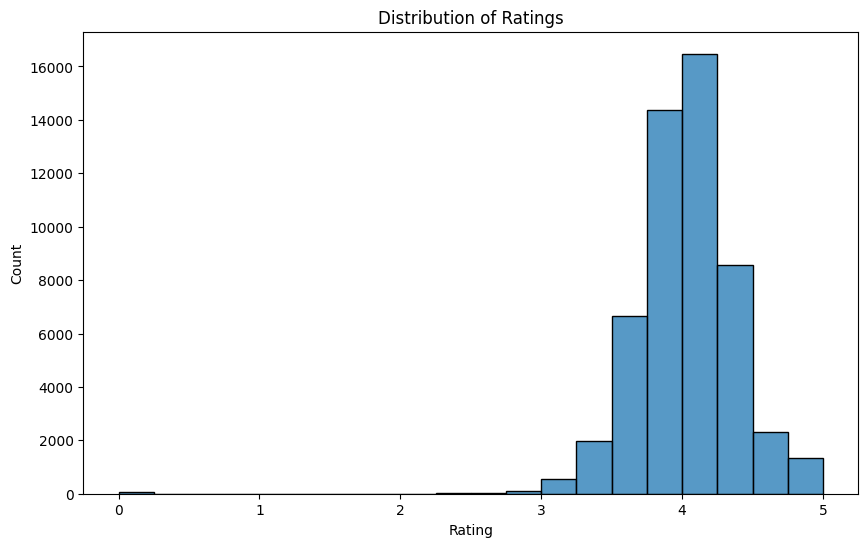

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot((df['rating']), bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Top 10 authors with the highest number of books in the dataset**

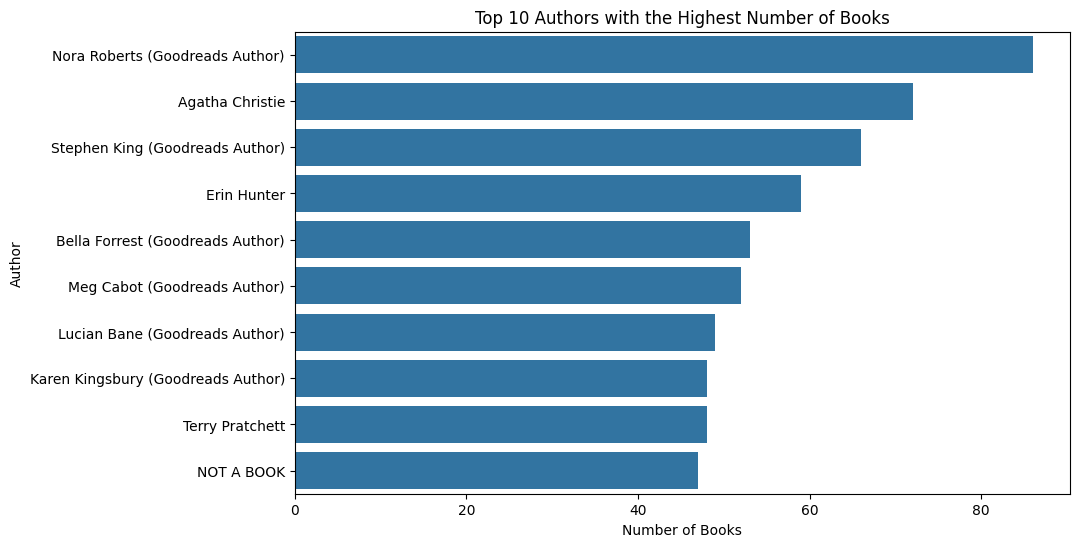

In [ ]:
top_authors = df['author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors with the Highest Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

### **Observations and Learning**

Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data.

### **Conclusion**

Explored, analysed and interpreted the textual data.

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>